<a href="https://colab.research.google.com/github/Ms-Gichuhi/Clicks-on-Ads-analysis-sing-R/blob/main/Online_shoppers_attention_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Research Question
Kira Plastinina (Links to an external site.) is a Russian brand that is sold through a defunct chain of retail stores. The brand’s Sales and Marketing team would like to understand their customer’s behavior from data that they have collected over the past year. More specifically, they would like to learn the characteristics of customer groups.

# Metric of success
Perform clustering stating insights drawn from your analysis and visualizations.

# Understaning the Data
The dataset consists of 10 numerical and 8 categorical attributes.

The 'Revenue' attribute can be used as the class label.

"Administrative", "Administrative Duration", "Informational", "Informational Duration", "Product Related" and "Product Related Duration" represents the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories. The values of these features are derived from the URL information of the pages visited by the user and updated in real-time when a user takes an action, e.g. moving from one page to another.

The "Bounce Rate", "Exit Rate" and "Page Value" features represent the metrics measured by "Google Analytics" for each page in the e-commerce site.

The value of the "Bounce Rate" feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session.

The value of the "Exit Rate" feature for a specific web page is calculated as for all pageviews to the page, the percentage that was the last in the session.

The "Page Value" feature represents the average value for a web page that a user visited before completing an e-commerce transaction.

The "Special Day" feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with the transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. For example, for Valentina’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8.

The dataset also includes the operating system, browser, region, traffic type, visitor type as returning or new visitor, a Boolean value indicating whether the date of the visit is weekend, and month of the year.

In [2]:
install.packages("data.table")
require(data.table)
# Importing our database
# ---
# install package data.table to work with data tables
library(data.table) # load package
install.packages("tidyverse") # install packages to work with data frame - extends into visualization
library(tidyverse) 

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: data.table

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.4     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::between()   masks data.table::between()
✖ dplyr::filter()    masks stats::filter()
✖ dplyr::first()     masks data.table::first()
✖ dplyr::lag()       masks stats::lag()
✖ dplyr::last()      masks data.table::last()
✖ purrr::transpose() masks data.table::transpose()



In [3]:
# Reading our dataset
# ---
# 
data <- fread('online_shoppers_intention.csv')

In [4]:
#previewing the top of the dataframe
head(data)

Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<int>,<int>,<int>,<chr>,<lgl>,<lgl>
0,0,0,0,1,0.000000,0.20000000,0.2000000,0,0,Feb,1,1,1,1,Returning_Visitor,FALSE,FALSE
0,0,0,0,2,64.000000,0.00000000,0.1000000,0,0,Feb,2,2,1,2,Returning_Visitor,FALSE,FALSE
0,-1,0,-1,1,-1.000000,0.20000000,0.2000000,0,0,Feb,4,1,9,3,Returning_Visitor,FALSE,FALSE
0,0,0,0,2,2.666667,0.05000000,0.1400000,0,0,Feb,3,2,2,4,Returning_Visitor,FALSE,FALSE
0,0,0,0,10,627.500000,0.02000000,0.0500000,0,0,Feb,3,3,1,4,Returning_Visitor,TRUE,FALSE
0,0,0,0,19,154.216667,0.01578947,0.0245614,0,0,Feb,2,2,1,3,Returning_Visitor,FALSE,FALSE


In [5]:
#previewing the bottom of our dataset
tail(data)

Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<int>,<int>,<int>,<chr>,<lgl>,<lgl>
0,0,1,0,16,503.000,0.000000000,0.03764706,0.00000,0,Nov,2,2,1,1,Returning_Visitor,FALSE,FALSE
3,145,0,0,53,1783.792,0.007142857,0.02903061,12.24172,0,Dec,4,6,1,1,Returning_Visitor,TRUE,FALSE
0,0,0,0,5,465.750,0.000000000,0.02133333,0.00000,0,Nov,3,2,1,8,Returning_Visitor,TRUE,FALSE
0,0,0,0,6,184.250,0.083333333,0.08666667,0.00000,0,Nov,3,2,1,13,Returning_Visitor,TRUE,FALSE
4,75,0,0,15,346.000,0.000000000,0.02105263,0.00000,0,Nov,2,2,3,11,Returning_Visitor,FALSE,FALSE
0,0,0,0,3,21.250,0.000000000,0.06666667,0.00000,0,Nov,3,2,1,2,New_Visitor,TRUE,FALSE


# Data cleaning

In [6]:
#checking for missing values
colSums(is.na(data))

Administrative Administrative_Duration           Informational 
                     14                      14                      14 
 Informational_Duration          ProductRelated ProductRelated_Duration 
                     14                      14                      14 
            BounceRates               ExitRates              PageValues 
                     14                      14                       0 
             SpecialDay                   Month        OperatingSystems 
                      0                       0                       0 
                Browser                  Region             TrafficType 
                      0                       0                       0 
            VisitorType                 Weekend                 Revenue 
                      0                       0                       0

For the missing values Administrative-14,Administrative_Duration-14,
Informational-14,Informational_Duration-14,ProductRelated-14,ProductRelated_Duration-14 and BounceRates-14 , we fill trhem up with 0.

This is because they are normal they may mean that no one visites this specific types of pages as well as no one may have bounced into a page on those specific days.

For the missing values in the ExitRates-14, we fill them up with the mean.


In [7]:
#dealing with missing values
#
data$Administrative[is.na(data$Administrative)] <- 0
data$Administrative_Duration[is.na(data$Administrative_Duration)] <- 0
data$Informational[is.na(data$Informational)] <- 0
data$Informational_Duration[is.na(data$Informational_Duration)] <- 0
data$ProductRelated[is.na(data$ProductRelated)] <- 0
data$ProductRelated_Duration[is.na(data$ProductRelated_Duration)] <- 0
data$BounceRates[is.na(data$BounceRates)] <- 0
data$ExitRates[is.na(data$ExitRates)] <- mean(data$ExitRates, na.rm = TRUE)

In [8]:
#confirming we have no more missing values
colSums(is.na(data))


Administrative Administrative_Duration           Informational 
                      0                       0                       0 
 Informational_Duration          ProductRelated ProductRelated_Duration 
                      0                       0                       0 
            BounceRates               ExitRates              PageValues 
                      0                       0                       0 
             SpecialDay                   Month        OperatingSystems 
                      0                       0                       0 
                Browser                  Region             TrafficType 
                      0                       0                       0 
            VisitorType                 Weekend                 Revenue 
                      0                       0                       0

In [9]:
#checking for duplicates
duplicates <- duplicated(data)

head(duplicates)

[1] FALSE FALSE FALSE FALSE FALSE FALSE

In [10]:
library(lattice)

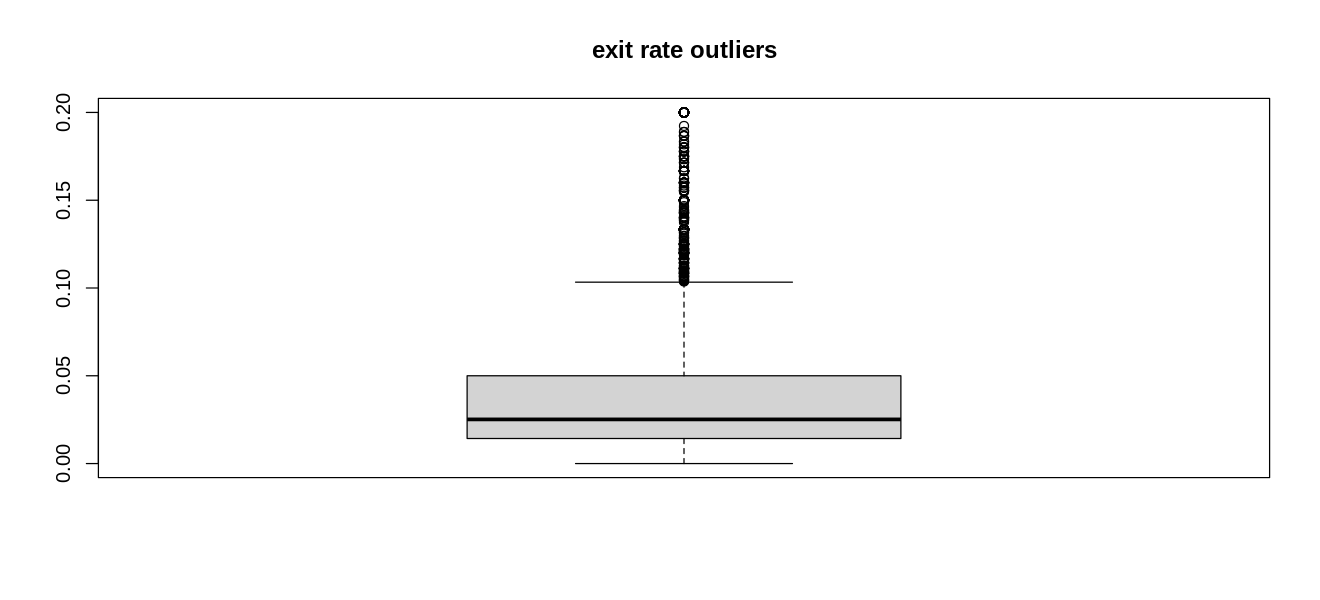

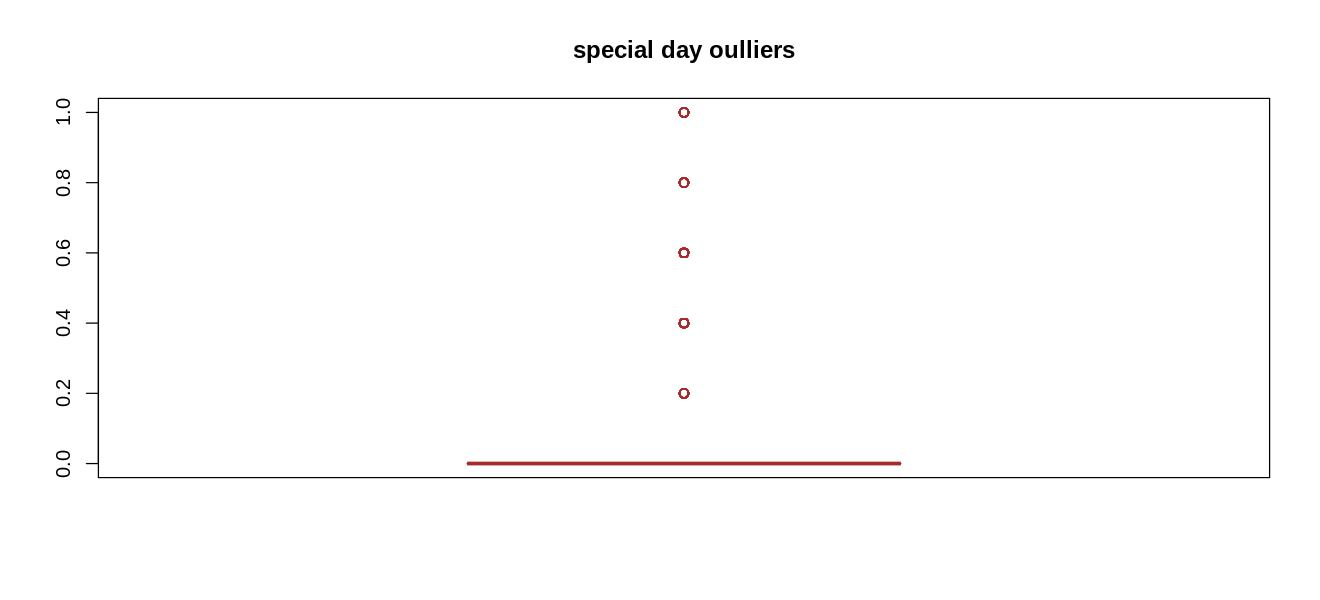

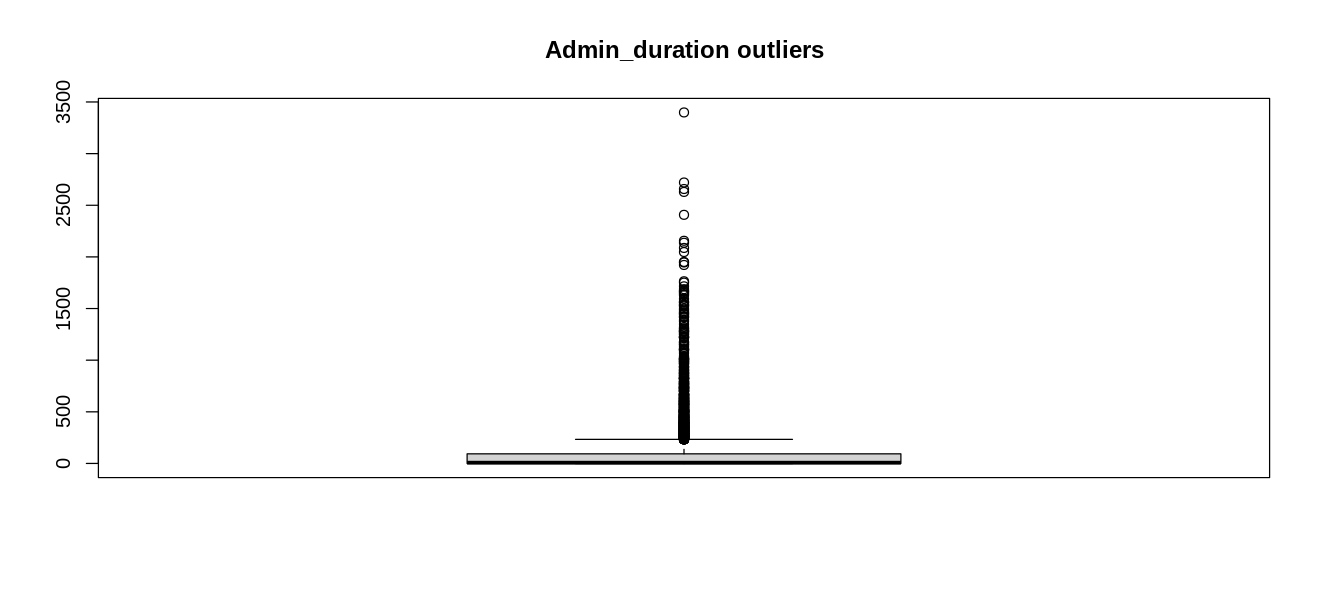

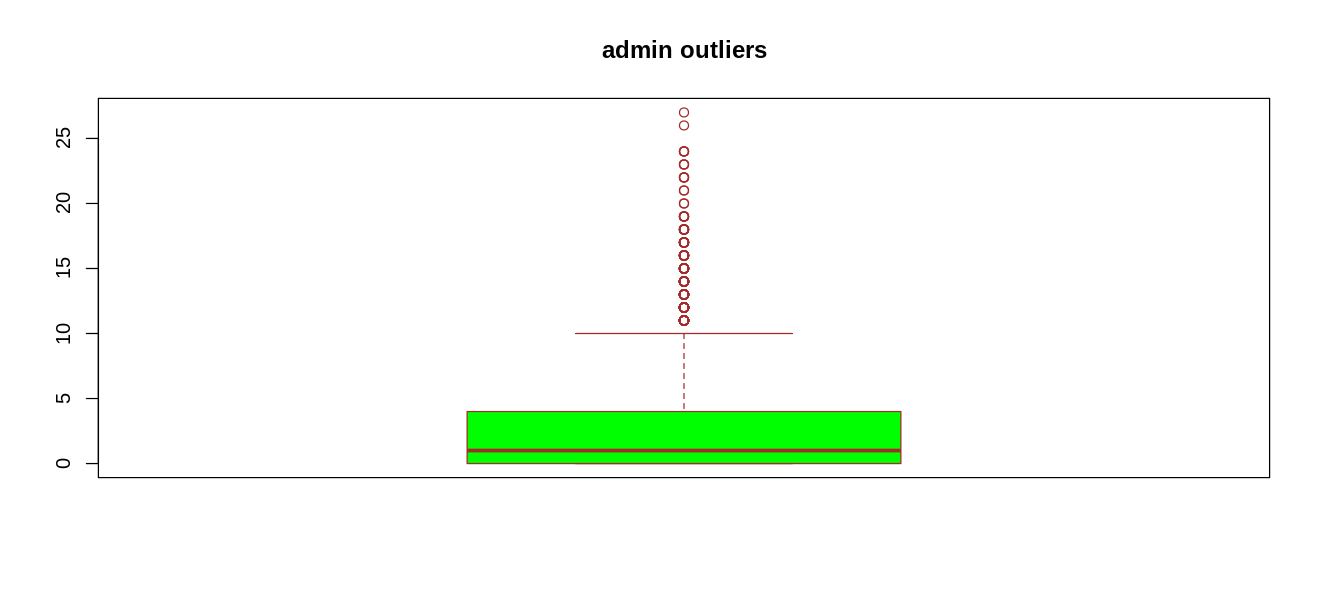

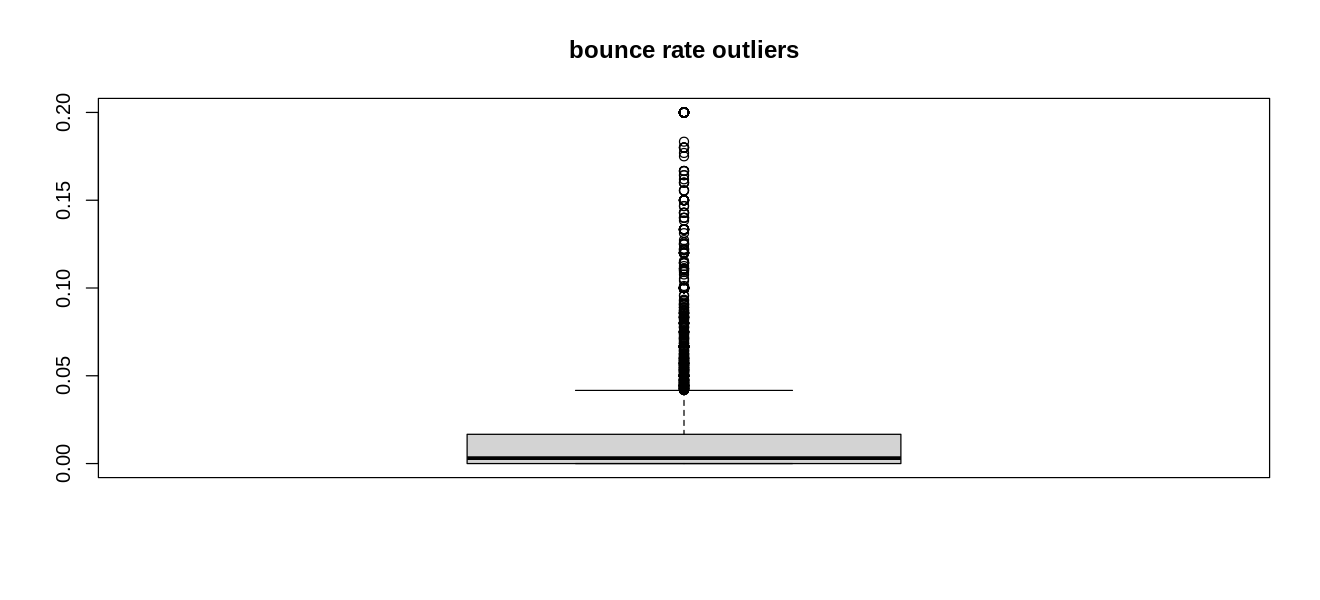

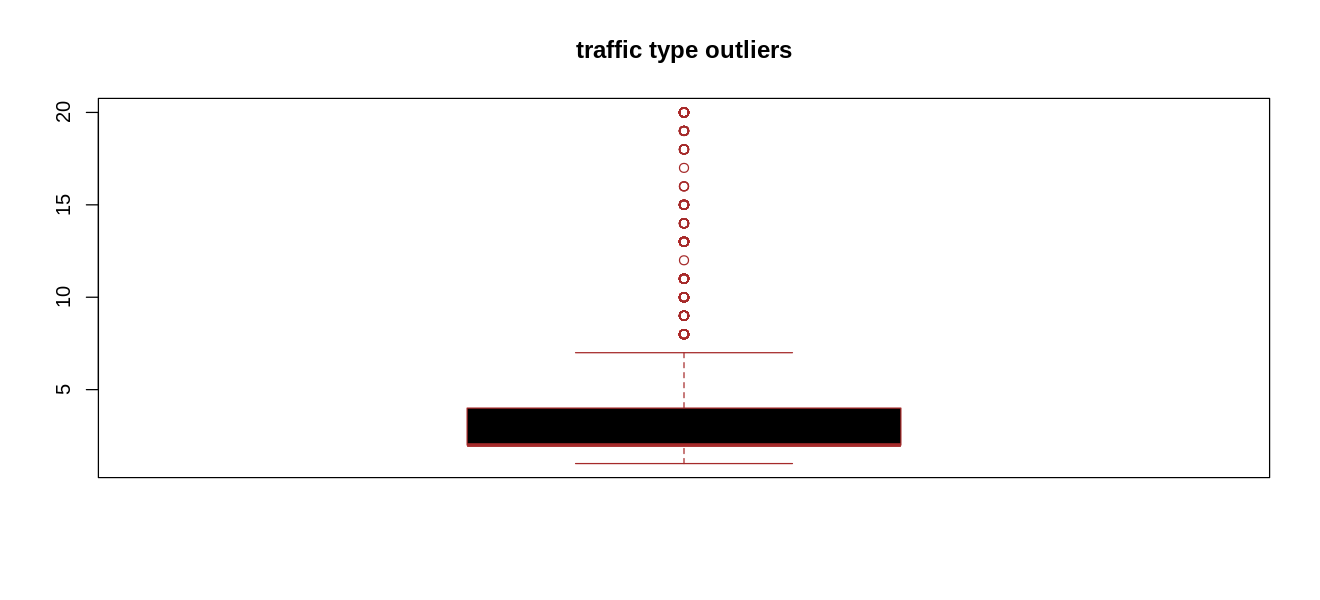

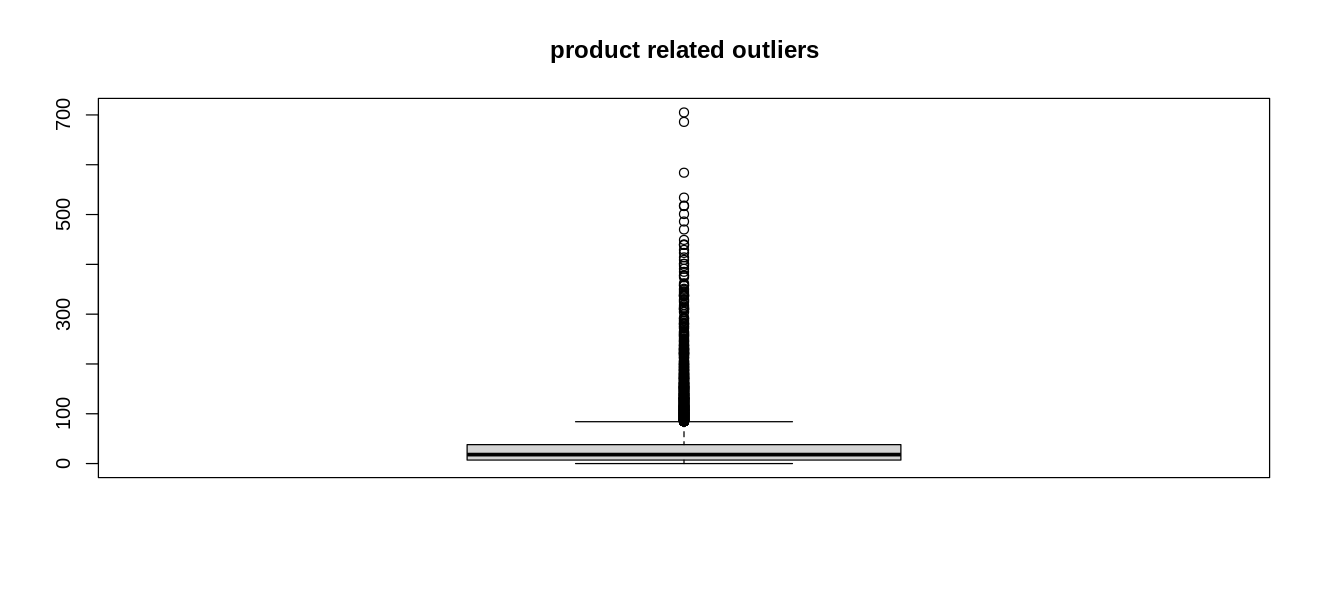

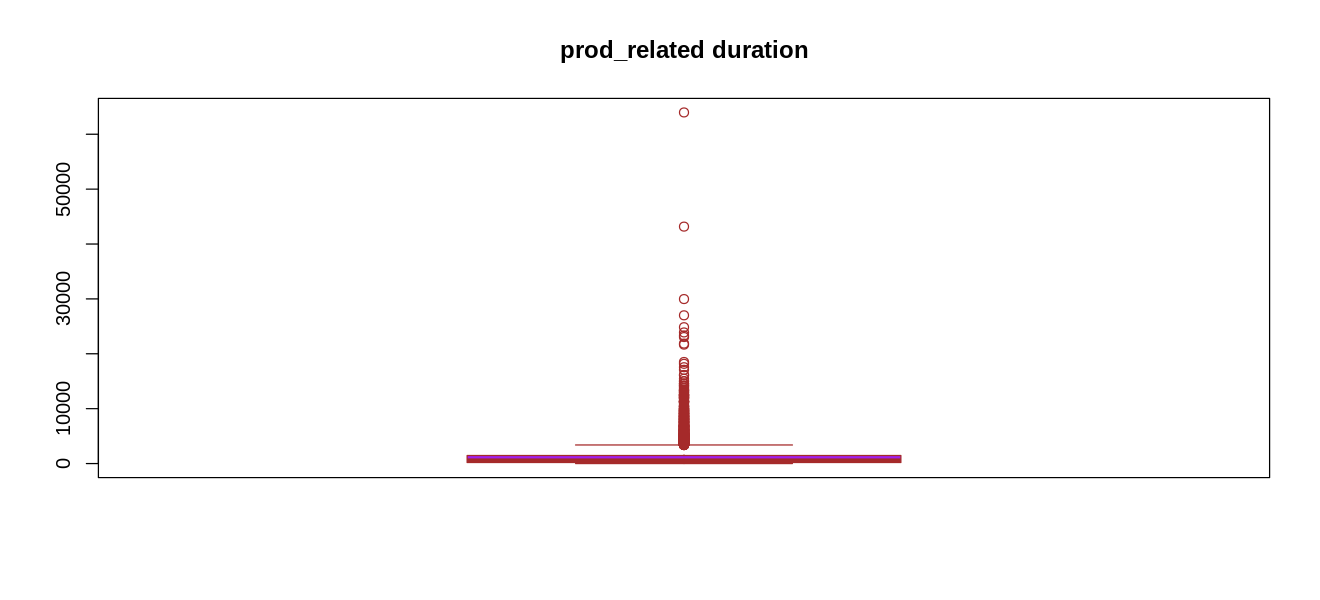

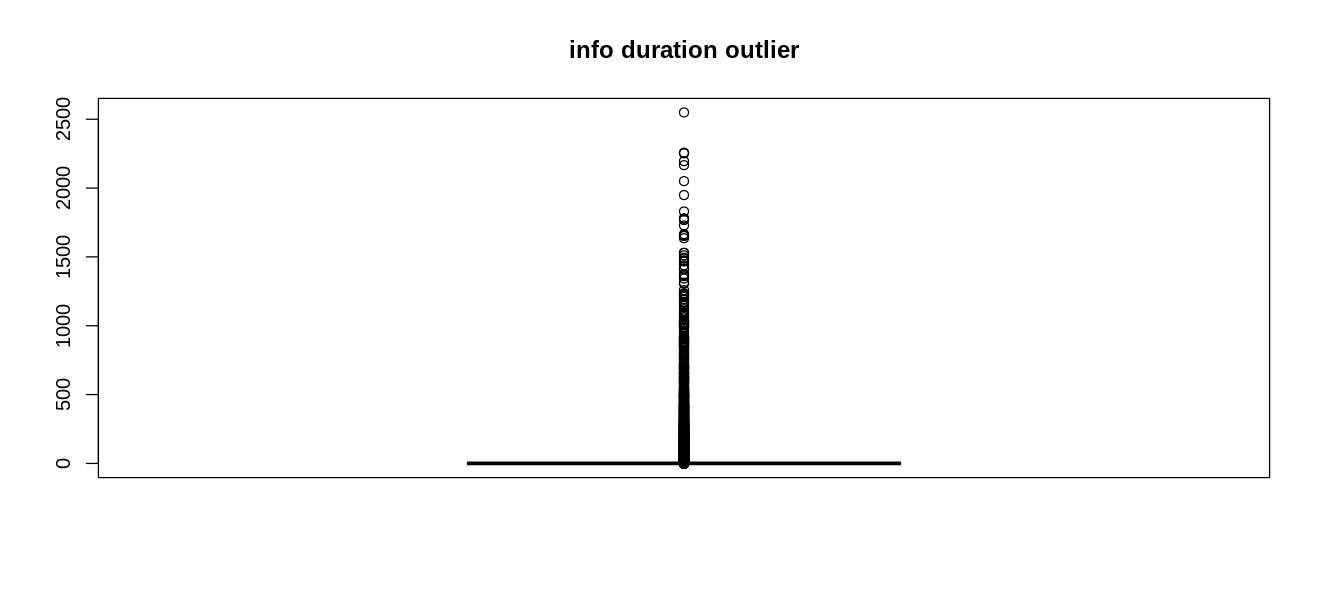

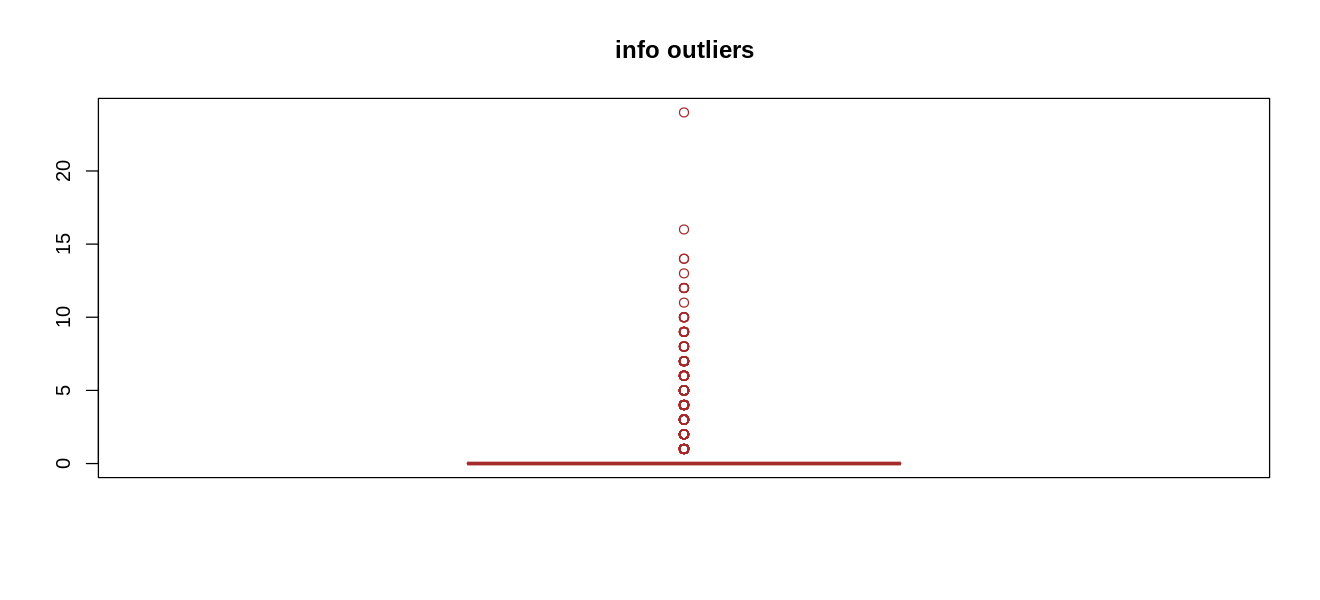

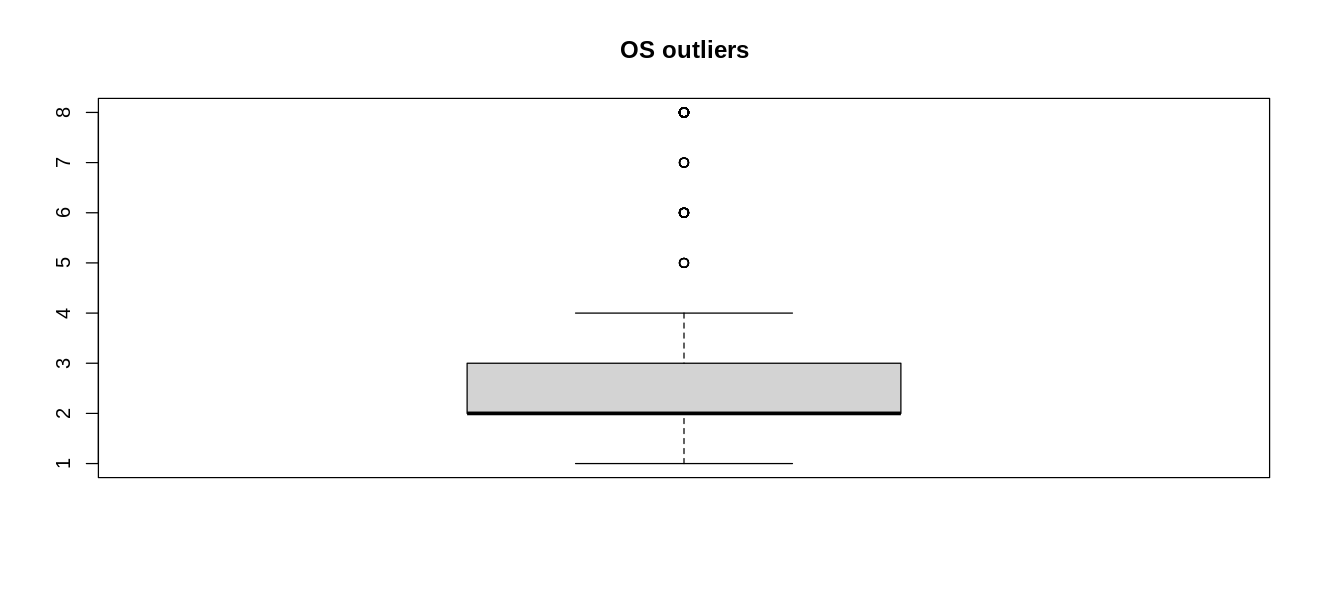

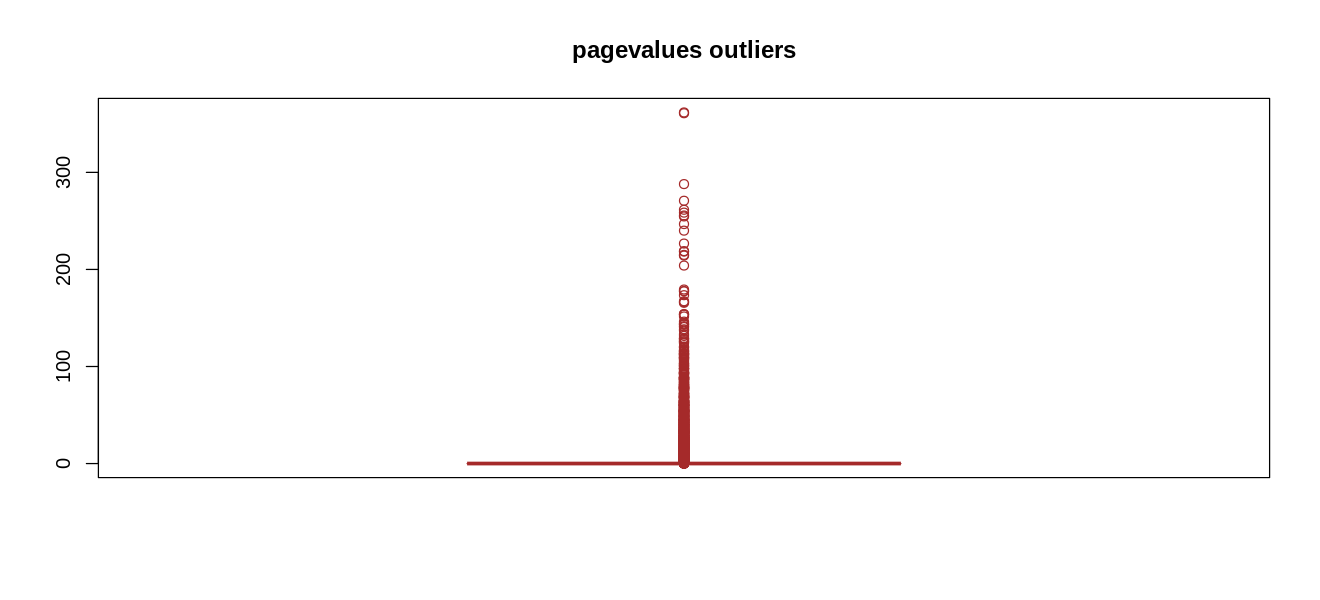

In [11]:
#checking for outliers
boxplot(data$ExitRates, main = "exit rate outliers")
boxplot(data$SpecialDay, main = "special day oulliers", col = "blue",
border = "brown")
boxplot(data$Administrative_Duration, main = "Admin_duration outliers")
boxplot(data$Administrative, main = "admin outliers", col = "green",
border = "brown")
boxplot(data$BounceRates, main = "bounce rate outliers")
boxplot(data$TrafficType, main = "traffic type outliers", col = "black",
border = "brown")
boxplot(data$ProductRelated, main = "product related outliers")
boxplot(data$ProductRelated_Duration, main = "prod_related duration", col = "purple",
border = "brown")
boxplot(data$Informational_Duration, main = "info duration outlier")
boxplot(data$Informational, main = "info outliers", col = "orange",
border = "brown")
boxplot(data$OperatingSystems, main = "OS outliers")
boxplot(data$PageValues, main = "pagevalues outliers", col = "orange",
border = "brown")


# Then use the function boxplot.stats which lists the outliers in the vectors
# ---
# boxplot.stats(data[,0:15])$out

we have outliers in our dataset ,though we leave them coz they maybe relevant in our data.

In [12]:
#installing more libriries and packages
install.packages('corrplot')
library(corrplot)
library(ggplot2) 
library(dplyr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

corrplot 0.84 loaded



## EDA



> # Univariate



In [13]:
# Mean administrative
data.admin.mean <- mean(data$Administrative)
# Printing out
data.admin.mean

# Mean administrative duration
Admin_duration.mean <-  mean(data$Administrative_Duration)
# Printing out
Admin_duration.mean

#mean info
info.mean <- mean(data$Informational)
# Printing out
info.mean

#mean internet usage
info_duration.mean <- mean(data$Informational_Duration)
# Printing out
info_duration.mean

# Mean product related
prod_related.mean <- mean(data$ProductRelated)
# Printing out
prod_related.mean

#mean bounce rate
bounce_rate.mean <- mean(data$BounceRates)
#printing out
bounce_rate.mean

#mean exit rate
exit.mean <- mean(data$ExitRates)
#printing out
exit.mean



[1] 2.315166

[1] 80.81431

[1] 0.5034063

[1] 34.46721

[1] 31.72782

[1] 0.02212731

[1] 0.04300254

In [14]:
#mode for age
#creating a function
getmode <- function(v) {
   uniqv <- unique(v)
   uniqv[which.max(tabulate(match(v, uniqv)))]
}

# Calculating the mode using out getmode() function
specialday.mode <- getmode(data$SpecialDay)
wekend.mode <-  getmode(data$Weekend)
visitortype.mode <- getmode(data$VisitorType)
traffictype.mode <- getmode(data$TrafficType)

#printing out  
specialday.mode 
wekend.mode 
visitortype.mode 
traffictype.mode 

[1] 0

[1] FALSE

[1] "Returning_Visitor"

[1] 2

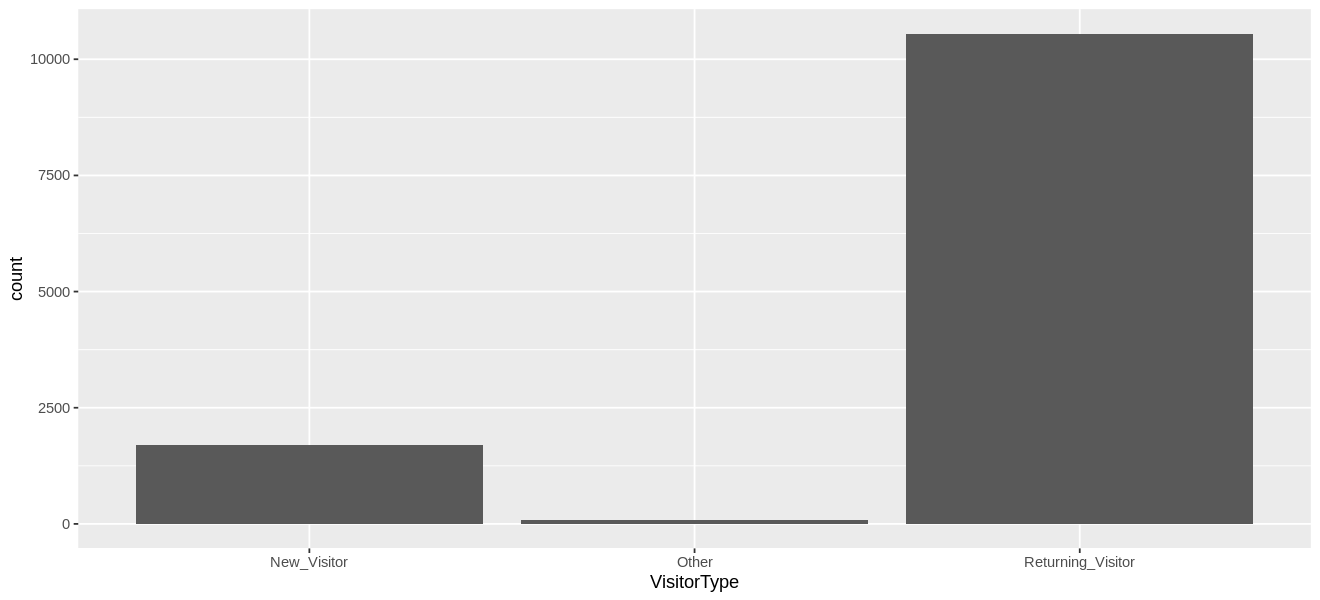

In [15]:

ggplot(data = data) +
  geom_bar(mapping = aes(x = VisitorType))

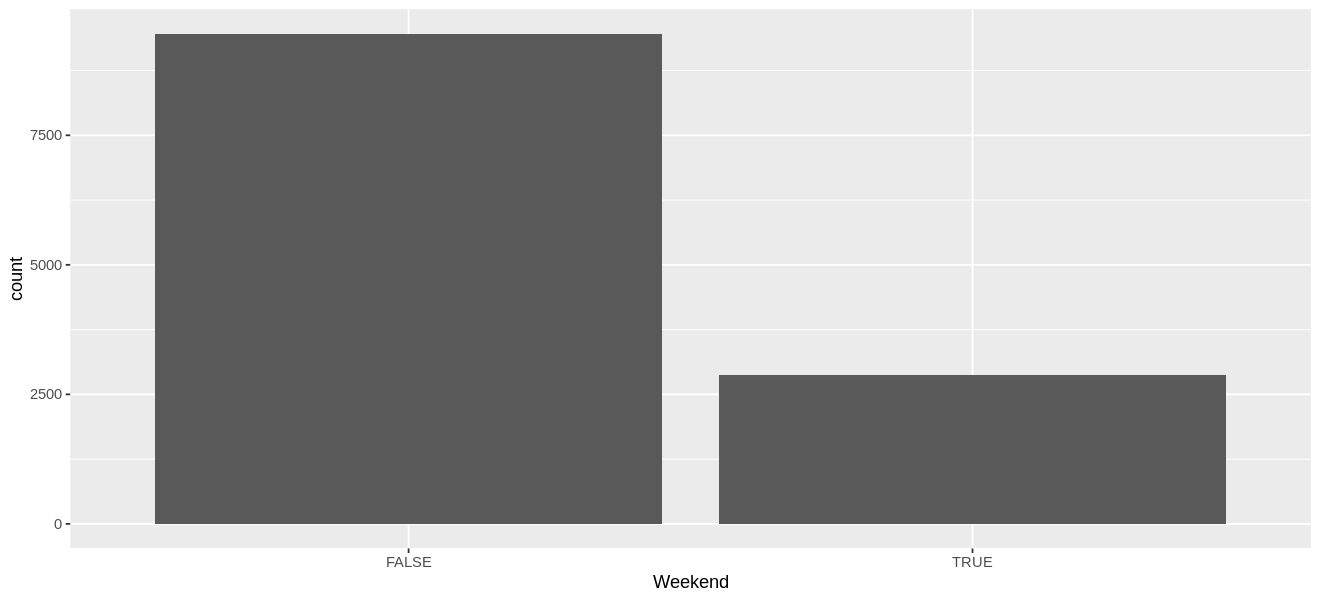

In [16]:
ggplot(data = data) +
  geom_bar(mapping = aes(x = Weekend))

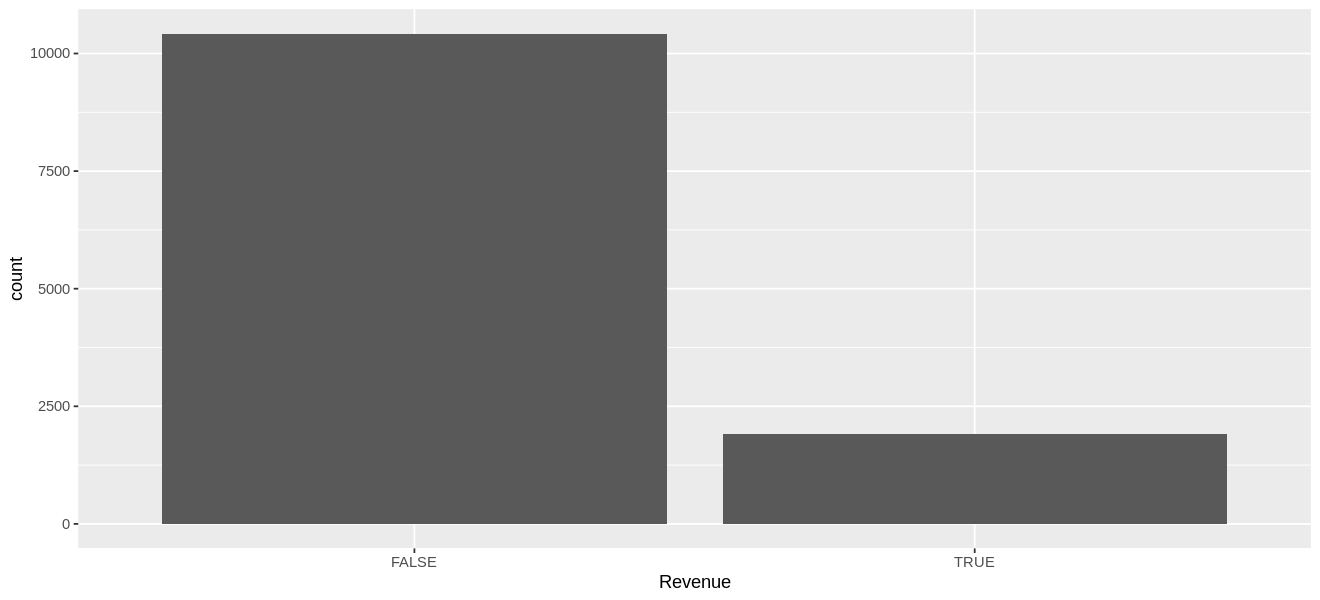

In [17]:
ggplot(data = data) +
  geom_bar(mapping = aes(x = Revenue))

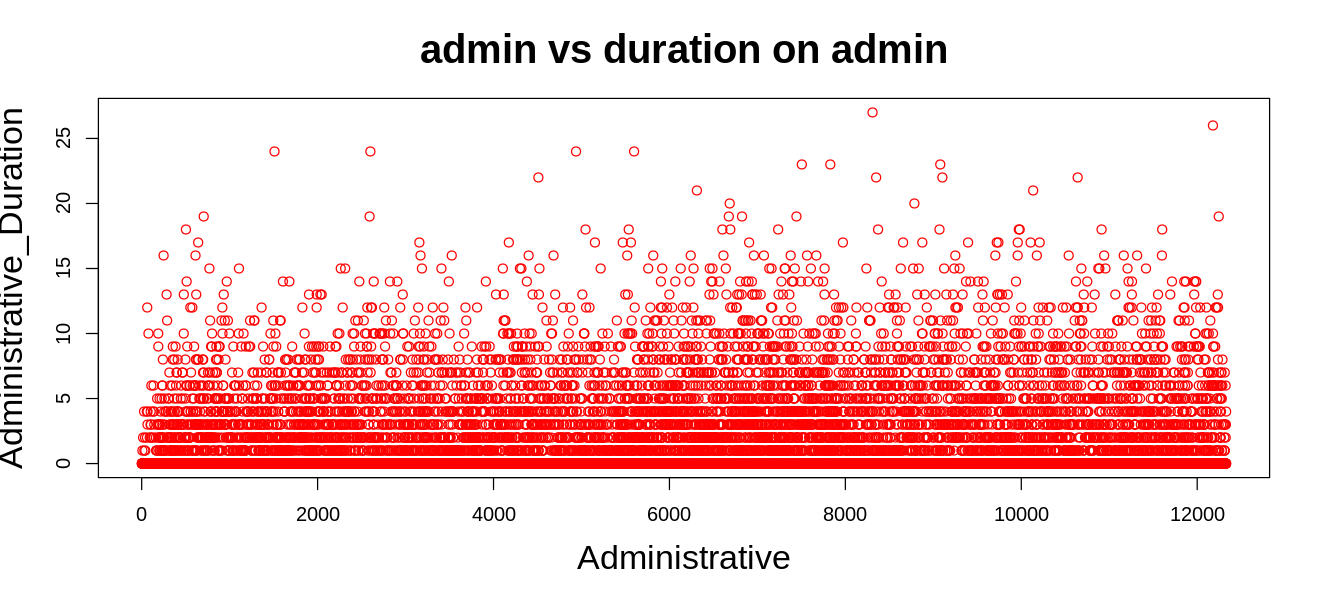

In [18]:
plot(data[['Administrative']],data[['Daily.Administrative_Duration']], xlab='Administrative',ylab='Administrative_Duration',
main = "admin vs duration on admin", col="red",  cex.main=2, cex.lab=1.7, cex.sub=1.2)

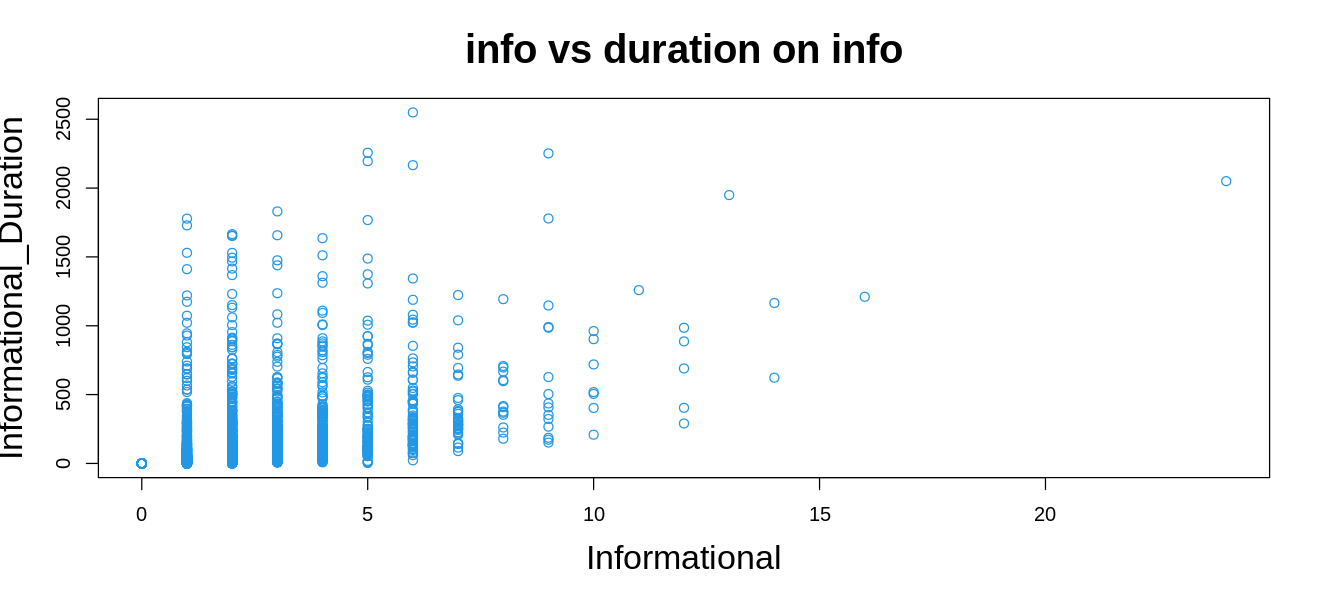

In [19]:
plot(data[['Informational']],data[['Informational_Duration']], xlab='Informational',ylab='Informational_Duration',
main ="info vs duration on info", col = 500, cex.main=2, cex.lab=1.7, cex.sub=1.2)

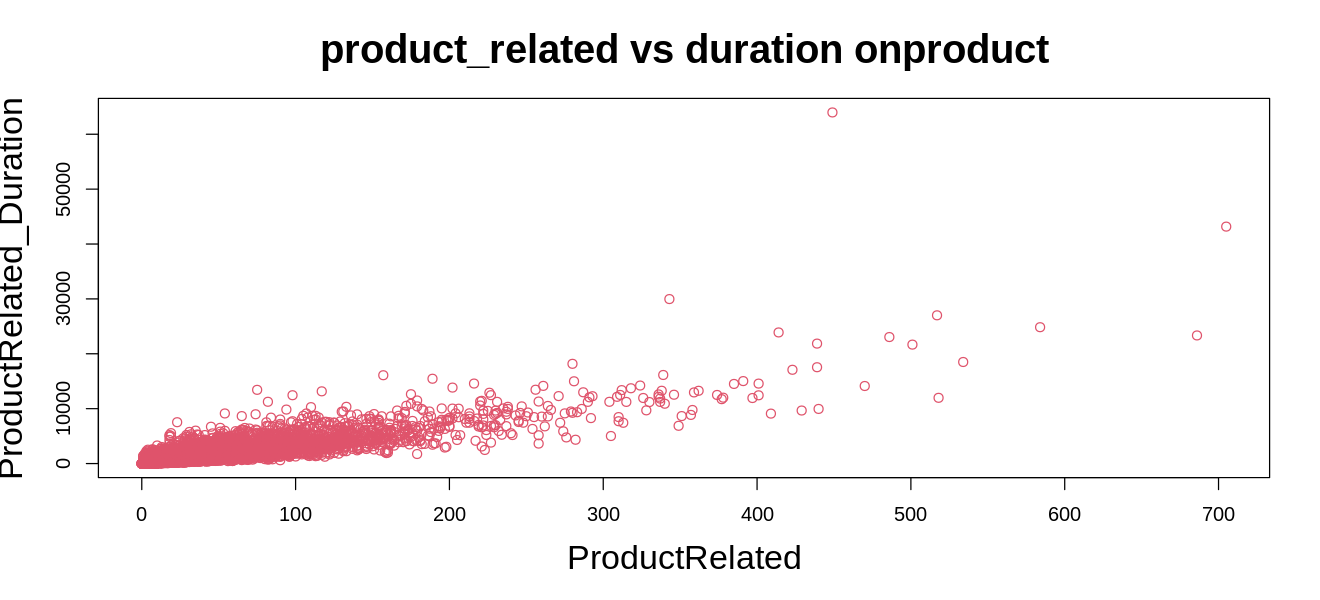

In [20]:
plot(data$ProductRelated,data$ProductRelated_Duration, xlab='ProductRelated',ylab='ProductRelated_Duration',
main = "product_related vs duration onproduct", col = 490,  cex.main=2, cex.lab=1.7, cex.sub=1.2)

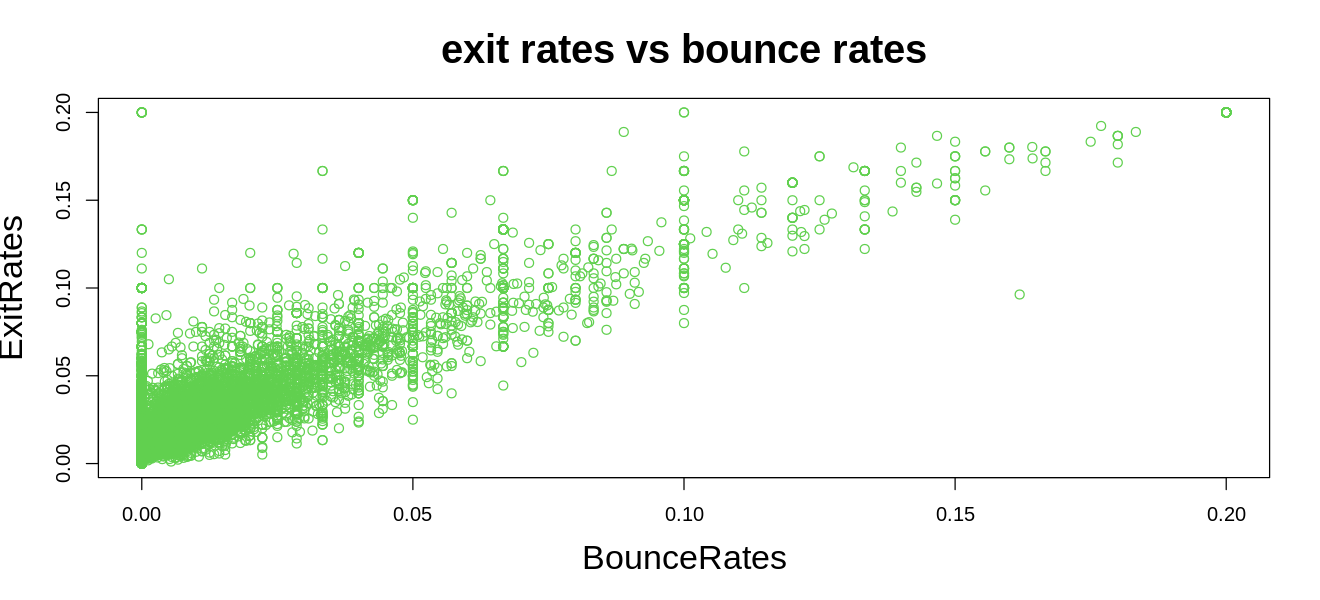

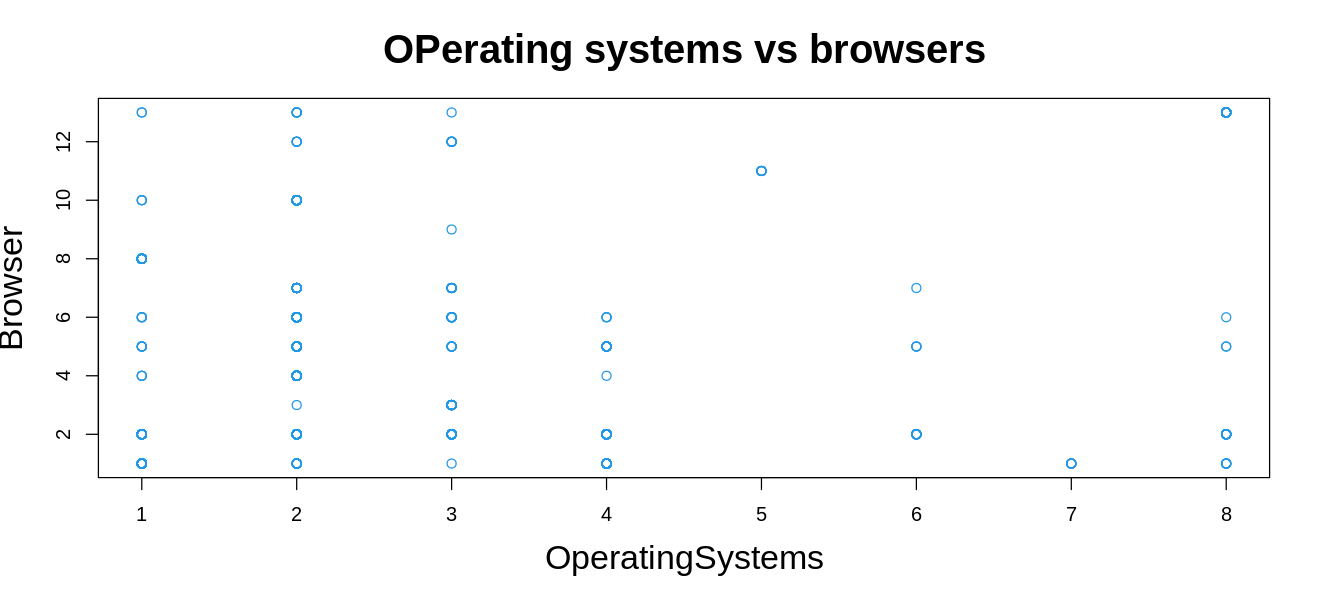

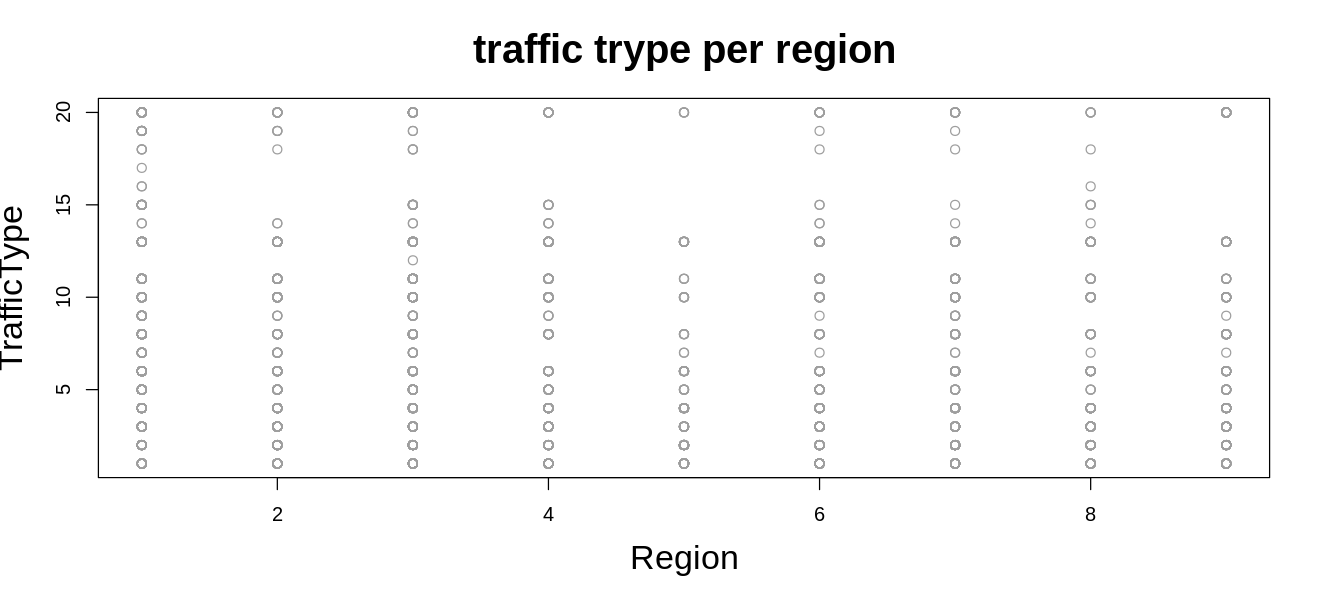

In [21]:

plot(data$BounceRates,data$ExitRates, xlab='BounceRates',ylab='ExitRates',
main = "exit rates vs bounce rates", col = 259,cex.main=2, cex.lab=1.7, cex.sub=1.2)

plot(data$OperatingSystems,data$Browser, xlab='OperatingSystems',ylab='Browser',
main = "OPerating systems vs browsers", col = 28,  cex.main=2, cex.lab=1.7, cex.sub=1.2)

plot(data$Region,data$TrafficType, xlab='Region',ylab='TrafficType',
main = "traffic trype per region", col = 96, cex.main=2, cex.lab=1.7, cex.sub=1.2)



># Bivariate analysis


In [27]:
#selecting numerical 

data_num <- dplyr::select_if(data, is.numeric)
head(data_num)

Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>
0,0,0,0,1,0.000000,0.20000000,0.2000000,0,0,1,1,1,1
0,0,0,0,2,64.000000,0.00000000,0.1000000,0,0,2,2,1,2
0,-1,0,-1,1,-1.000000,0.20000000,0.2000000,0,0,4,1,9,3
0,0,0,0,2,2.666667,0.05000000,0.1400000,0,0,3,2,2,4
0,0,0,0,10,627.500000,0.02000000,0.0500000,0,0,3,3,1,4
0,0,0,0,19,154.216667,0.01578947,0.0245614,0,0,2,2,1,3


In [28]:
#finding correlation 

install.packages("Hmisc")
library('Hmisc')

res <- rcorr(as.matrix(data_num))
corr <- data.frame(res$r)
corr


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘png’, ‘jpeg’, ‘checkmate’, ‘Formula’, ‘latticeExtra’, ‘htmlTable’, ‘viridis’


Loading required package: survival

Loading required package: Formula


Attaching package: ‘Hmisc’


The following objects are masked from ‘package:dplyr’:

    src, summarize


The following objects are masked from ‘package:base’:

    format.pval, units




,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Administrative,1.000000000,0.601590850,0.376958263,0.255871673,0.431154028,0.373955651,-0.223023117,-0.316104924,0.09898959,-0.094777598,-0.006347063,-0.025034572,-0.005486805,-0.03356071
Administrative_Duration,0.601590850,1.000000000,0.302789630,0.238049482,0.289122240,0.355441990,-0.143856501,-0.205594004,0.06761547,-0.073299126,-0.007351107,-0.015391383,-0.005554426,-0.01437403
Informational,0.376958263,0.302789630,1.000000000,0.618999119,0.374277516,0.387607079,-0.115840711,-0.163523930,0.04867463,-0.048182220,-0.009369614,-0.038135653,-0.029321804,-0.03439508
Informational_Duration,0.255871673,0.238049482,0.618999119,1.000000000,0.280073713,0.347385040,-0.073938122,-0.105201049,0.03087235,-0.030569577,-0.009555252,-0.019273147,-0.027167810,-0.02465849
ProductRelated,0.431154028,0.289122240,0.374277516,0.280073713,1.000000000,0.860934712,-0.204014940,-0.292134887,0.05630474,-0.023931522,0.004300552,-0.013118380,-0.038101051,-0.04303380
ProductRelated_Duration,0.373955651,0.355441990,0.387607079,0.347385040,0.860934712,1.000000000,-0.184021665,-0.251588996,0.05283310,-0.036368582,0.002980483,-0.007369035,-0.033075532,-0.03636540
BounceRates,-0.223023117,-0.143856501,-0.115840711,-0.073938122,-0.204014940,-0.184021665,1.000000000,0.913327919,-0.11917076,0.073235620,0.024025745,-0.015875241,-0.006603618,0.07892963
ExitRates,-0.316104924,-0.205594004,-0.163523930,-0.105201049,-0.292134887,-0.251588996,0.913327919,1.000000000,-0.17438709,0.102893260,0.014740953,-0.004406084,-0.008833343,0.07894162
PageValues,0.098989585,0.067615474,0.048674629,0.030872351,0.056304740,0.052833097,-0.119170757,-0.174387092,1.00000000,-0.063541272,0.018507947,0.045591919,0.011315299,0.01253169


<0 x 0 matrix>

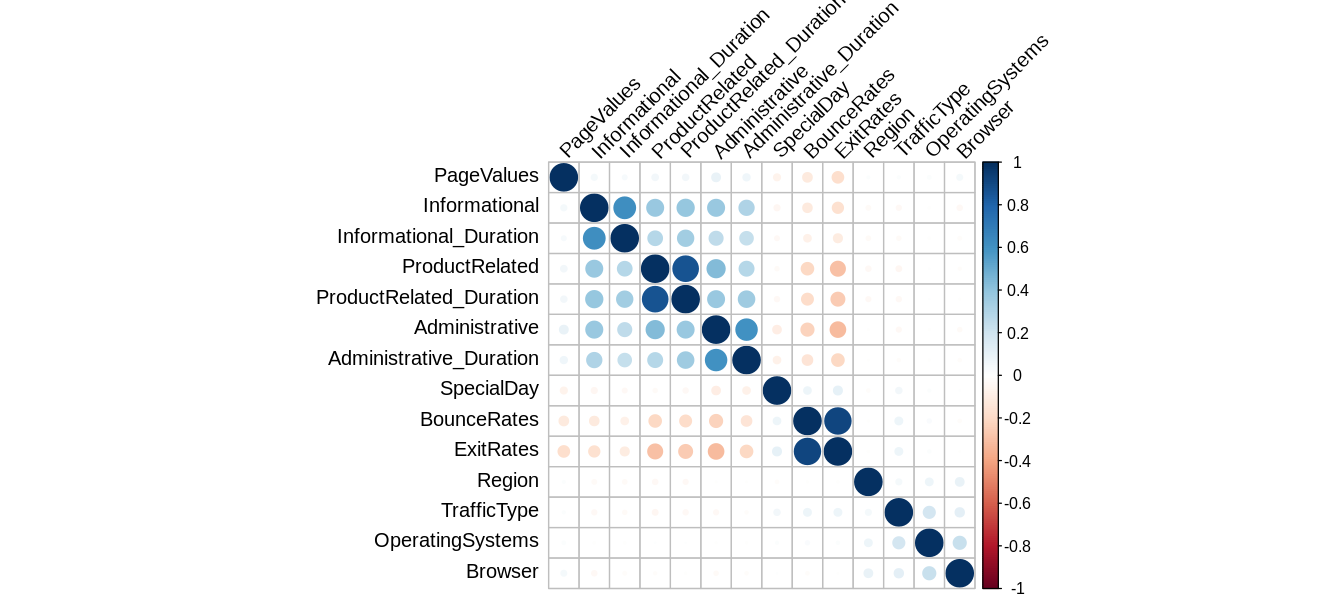

In [29]:
#plotting the correlation matrix
corrplot(res$r,  order = "hclust", 
         tl.col = "black", tl.srt = 45)
plot <- data.frame(corr$Revenue)

plot

#Modelling

In [32]:
head(data)

Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<int>,<int>,<int>,<chr>,<lgl>,<lgl>
0,0,0,0,1,0.000000,0.20000000,0.2000000,0,0,Feb,1,1,1,1,Returning_Visitor,FALSE,FALSE
0,0,0,0,2,64.000000,0.00000000,0.1000000,0,0,Feb,2,2,1,2,Returning_Visitor,FALSE,FALSE
0,-1,0,-1,1,-1.000000,0.20000000,0.2000000,0,0,Feb,4,1,9,3,Returning_Visitor,FALSE,FALSE
0,0,0,0,2,2.666667,0.05000000,0.1400000,0,0,Feb,3,2,2,4,Returning_Visitor,FALSE,FALSE
0,0,0,0,10,627.500000,0.02000000,0.0500000,0,0,Feb,3,3,1,4,Returning_Visitor,TRUE,FALSE
0,0,0,0,19,154.216667,0.01578947,0.0245614,0,0,Feb,2,2,1,3,Returning_Visitor,FALSE,FALSE


In [33]:
# Encoding categorical variables
month = data.frame(model.matrix(~0+data$Month))
OS = data.frame(model.matrix(~0+data$OperatingSystems))
brws = data.frame(model.matrix(~0+data$Browser))
reg = data.frame(model.matrix(~0+data$Region))
trfc = data.frame(model.matrix(~0+data$TrafficType))
vistr = data.frame(model.matrix(~0+data$VisitorType))
wknd = data.frame(model.matrix(~0+data$Weekend))
rev = data.frame(model.matrix(~0+data$Revenue))

In [ ]:
# Dropping columns which have already encoded
drop_cols = c('Month', 'OperatingSystems',	'Browser',	'Region',	'TrafficType', 'VisitorType', 'Weekend', 'Revenue')
data = select(data.frame(cbind(data, month, OS, brws, reg, trfc, vistr, wknd, rev)), -drop_cols)



> # K means clustering



In [38]:
# Normalising the data
data = as.data.frame(apply(data, 2,  function(x) (x - min(x))/max(x) - min(x)))

In [47]:
pkgs <- c("factoextra",  "NbClust")
install.packages(pkgs)
library(NbClust)

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘pbkrtest’, ‘lme4’, ‘car’, ‘rstatix’, ‘FactoMineR’, ‘ggpubr’




In [48]:
library(factoextra)

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



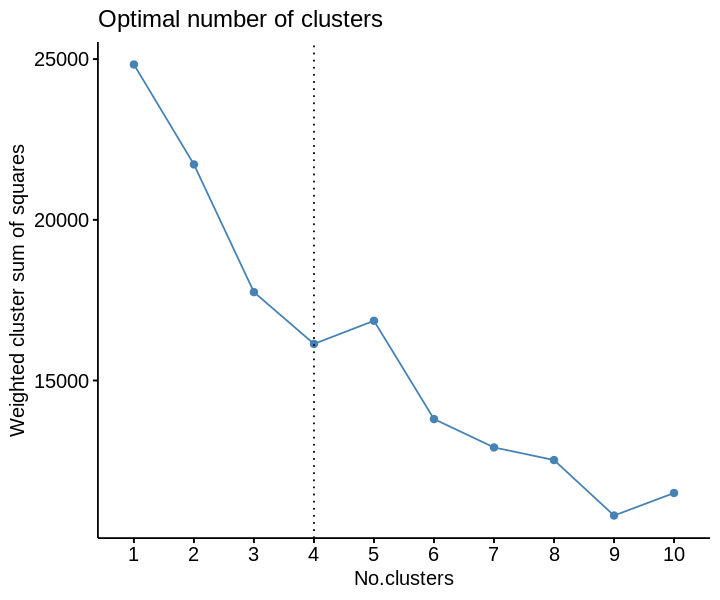

In [51]:
# Finding the optimal number of clusters using the elbow method
options(repr.plot.width = 6, repr.plot.height = 5)
fviz_nbclust(data, kmeans, method = 'wss') + 
  geom_vline(xintercept = 4, linetype = 3) + 
  labs(x = 'No.clusters', y = 'Weighted cluster sum of squares')

In [52]:
# Performing clustering with the optimal number of clusters
results = kmeans(data, 4)

# Checking the cluster centers of each variable
results$centers

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,⋯,data.Browser,data.Region,data.TrafficType,data.VisitorTypeNew_Visitor,data.VisitorTypeOther,data.VisitorTypeReturning_Visitor,data.WeekendFALSE,data.WeekendTRUE,data.RevenueFALSE,data.RevenueTRUE
1,0.07894678,1.022401,0.01901026,1.012216,0.04977979,1.020995,0.12919872,0.23525866,0.006263568,0.00000000,⋯,-0.9042291,-0.7627573,-0.8333132,0.1213036,0.010259505,0.8684369,1.0000000,0.0000000,1,0
2,0.12568911,1.035449,0.03275681,1.022991,0.06838322,1.029344,0.02558576,0.09777584,0.075365536,0.02316562,⋯,-0.8882035,-0.7686350,-0.8489256,0.2211740,0.008385744,0.7704403,0.7384696,0.2615304,0,1
3,0.08490846,1.024216,0.02297031,1.014871,0.04330462,1.017444,0.10457685,0.20730036,0.005147711,0.06281131,⋯,-0.9074260,-0.7616435,-0.8476150,0.1578725,0.002532714,0.8395948,0.0000000,1.0000000,1,0
4,0.07590392,1.021057,0.01723082,1.011288,0.03742188,1.015377,0.13344374,0.24759725,0.005370947,0.08824265,⋯,-0.8912060,-0.7588076,-0.8488196,0.1089744,0.007191995,0.8838336,1.0000000,0.0000000,1,0


In [53]:
# Previewing the size of observations for each cluster
results$size

[1] 1657 1908 2369 6396

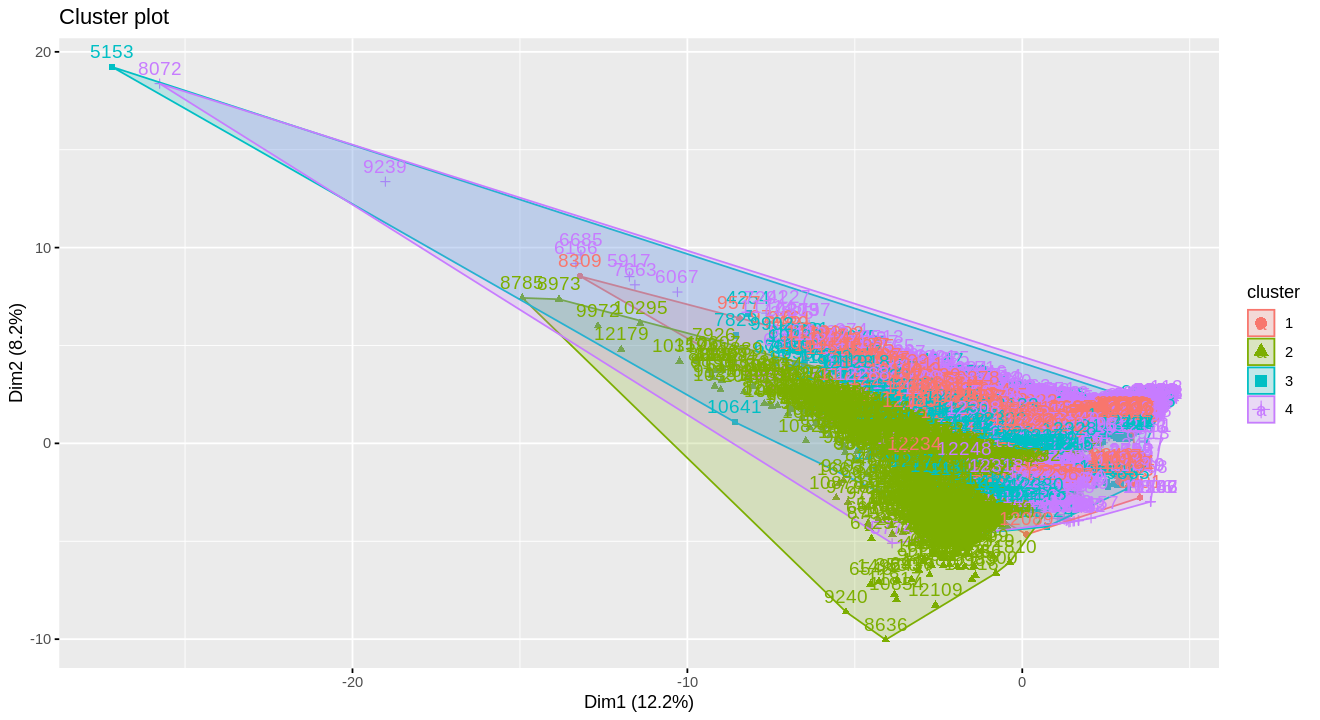

In [54]:
# Visualising the clustering results
options(repr.plot.width = 11, repr.plot.height = 6)
fviz_cluster(results, data)

In [72]:
# visualizing how some features have been clustered

vis1 = ggplot(data, aes(Informational, Informational_Duration, col = results$cluster)) +
    geom_point() + theme(legend.position = 'none') +
    labs(x ='Informational', y = 'Informational_Duration')

vis2 = ggplot(data, aes(ProductRelated, ProductRelated_Duration, col = results$cluster)) + 
    geom_point() + theme(legend.position = 'none') + 
    labs(x='ProductRelated', y ='ProductRelated_Duration')
vis3 = ggplot(data, aes(Administrative, Administrative_Duration, col = results$cluster)) +
    geom_point() + theme(legend.position = 'none') +
    labs(x = 'Administrative', y = 'Administrative_Duration')

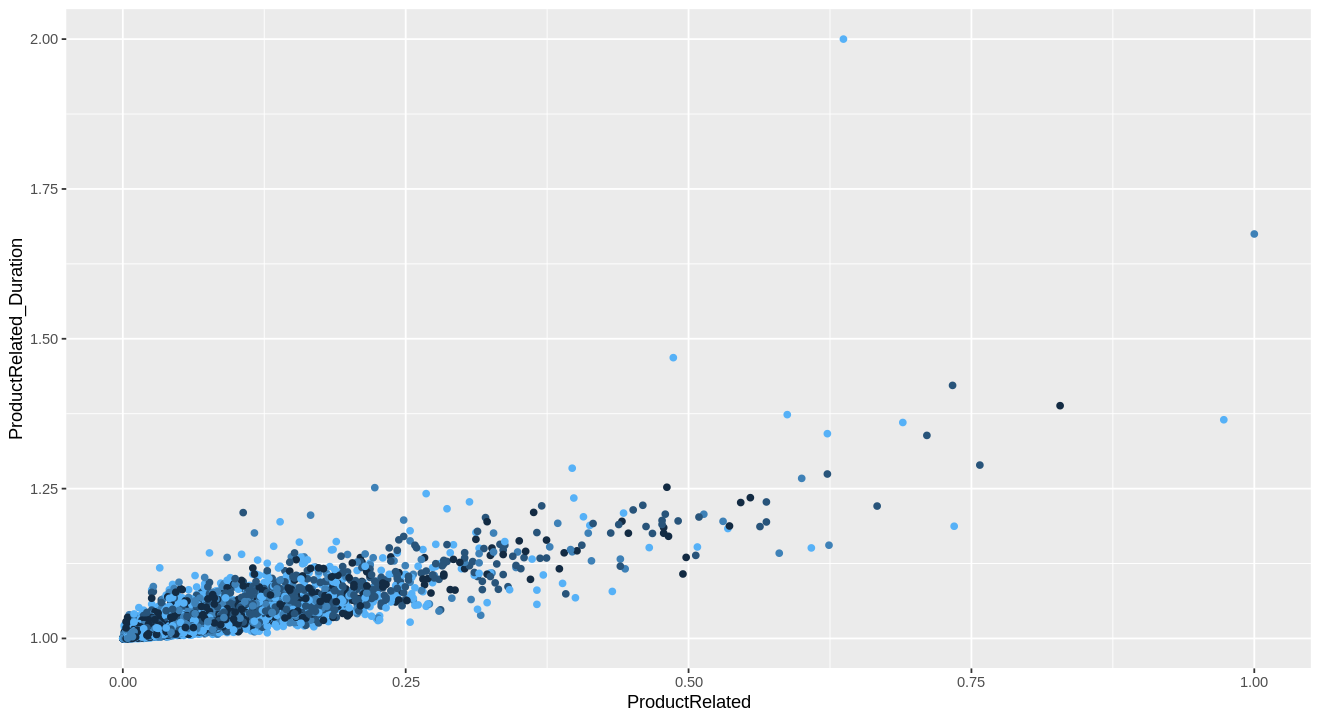

In [69]:
vis1

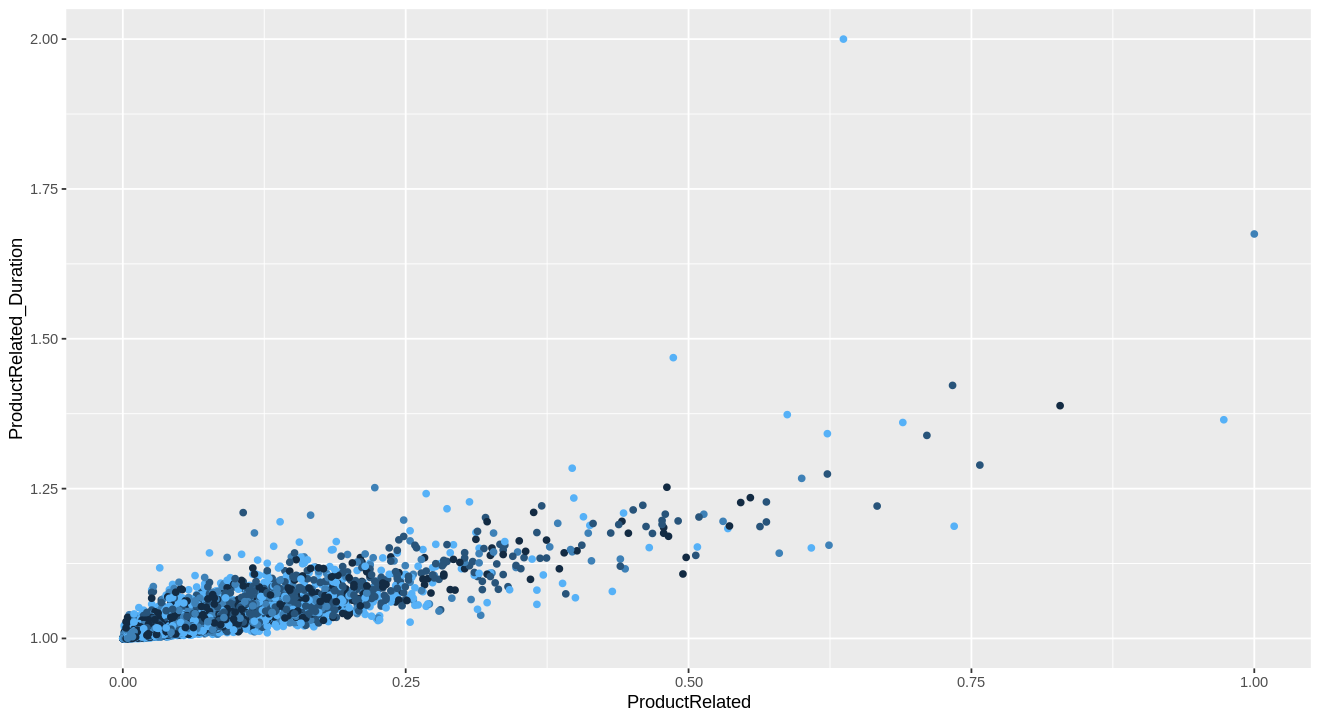

In [73]:
vis2

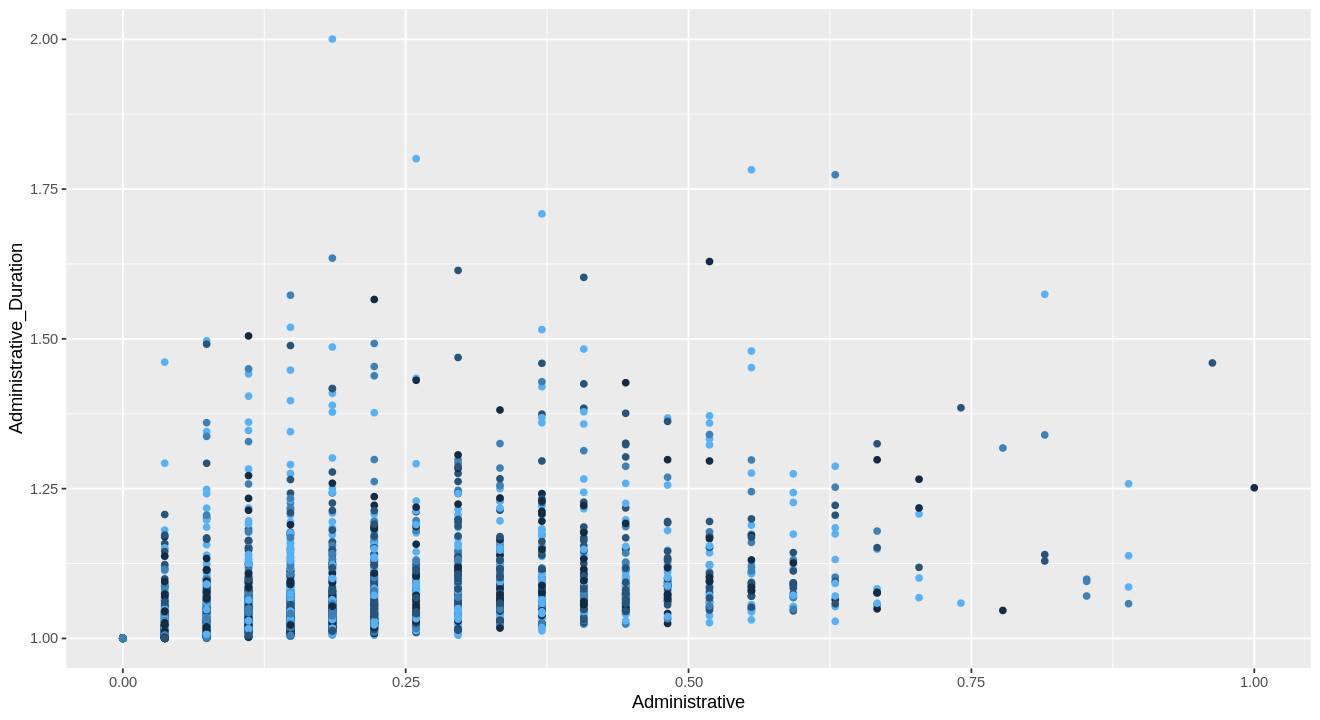

In [74]:
vis3



> # Hierarchical Clustering



In [78]:
# we start by scaling the data using the R function scale() as follows
# ---
# 
data <- scale(data)
head(data)

Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,⋯,data.Browser,data.Region,data.TrafficType,data.VisitorTypeNew_Visitor,data.VisitorTypeOther,data.VisitorTypeReturning_Visitor,data.WeekendFALSE,data.WeekendTRUE,data.RevenueFALSE,data.RevenueTRUE
-0.6969647,-0.4571437,-0.3963539,-0.2448819,-0.6908553,-0.6242740,3.67464750,3.2370784,-0.317165,-0.3088088,⋯,-0.7902608,-0.8941422,-0.76259811,-0.3990708,-0.08331294,0.4106044,0.5505294,-0.5505294,0.4278544,-0.4278544
-0.6969647,-0.4571437,-0.3963539,-0.2448819,-0.6683722,-0.5908311,-0.45712504,1.1752117,-0.317165,-0.3088088,⋯,-0.2079435,-0.8941422,-0.51416134,-0.3990708,-0.08331294,0.4106044,0.5505294,-0.5505294,0.4278544,-0.4278544
-0.6969647,-0.4628004,-0.3963539,-0.2519867,-0.6908553,-0.6247966,3.67464750,3.2370784,-0.317165,-0.3088088,⋯,-0.7902608,2.4369825,-0.26572458,-0.3990708,-0.08331294,0.4106044,0.5505294,-0.5505294,0.4278544,-0.4278544
-0.6969647,-0.4571437,-0.3963539,-0.2448819,-0.6683722,-0.6228806,0.57581809,1.9999584,-0.317165,-0.3088088,⋯,-0.2079435,-0.4777516,-0.01728781,-0.3990708,-0.08331294,0.4106044,0.5505294,-0.5505294,0.4278544,-0.4278544
-0.6969647,-0.4571437,-0.3963539,-0.2448819,-0.4885078,-0.2963768,-0.04394779,0.1442783,-0.317165,-0.3088088,⋯,0.3743739,-0.8941422,-0.01728781,-0.3990708,-0.08331294,0.4106044,-1.8162862,1.8162862,0.4278544,-0.4278544
-0.6969647,-0.4571437,-0.3963539,-0.2448819,-0.2861603,-0.5436888,-0.13093247,-0.3802316,-0.317165,-0.3088088,⋯,-0.2079435,-0.8941422,-0.26572458,-0.3990708,-0.08331294,0.4106044,0.5505294,-0.5505294,0.4278544,-0.4278544


In [79]:
# using euclidean distance and the ward2 method to perform hierachical clustering
results1 = hclust(dist(data, method = 'euclidean'), method = 'ward.D2')


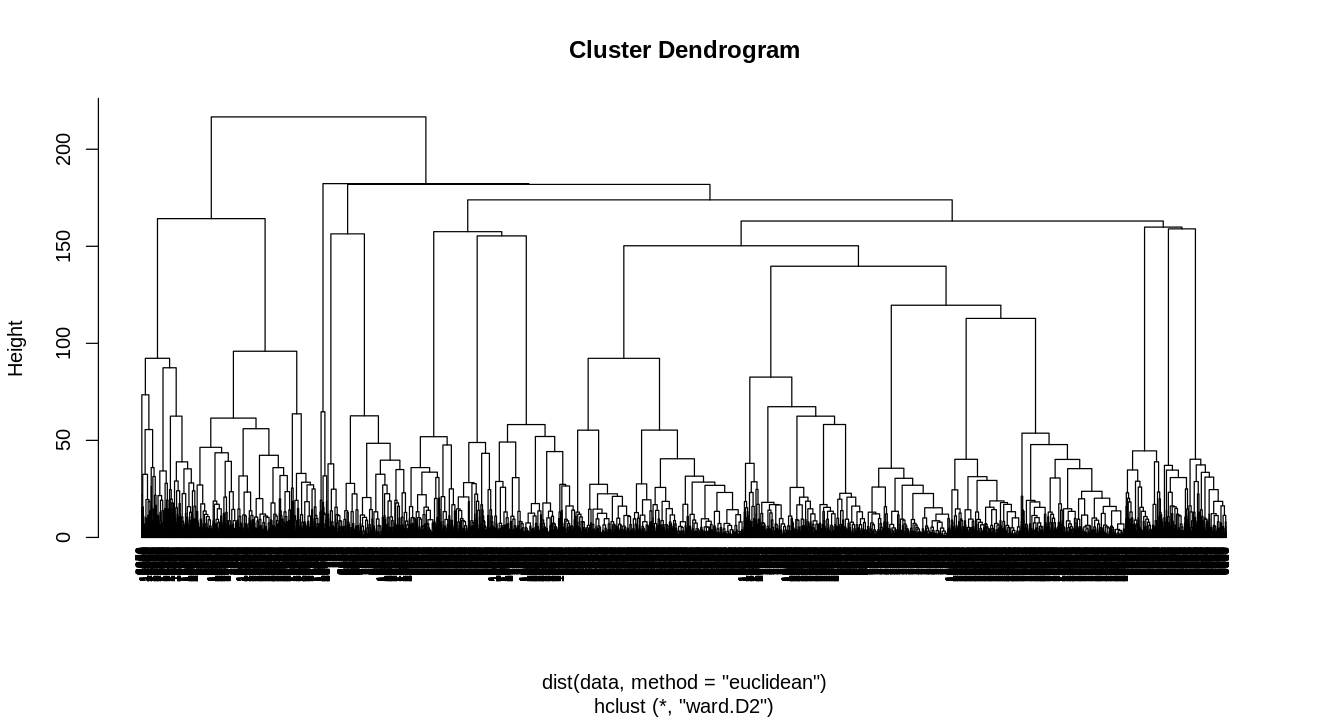

In [85]:
# Visualizing the hierachical dendogram
options(repr.plot.width = 11, repr.plot.height = 6)
plot(results1, cex= 0.6, hang = -1)

For this project, the Kmean clustering defines the clusters pretty weel unlike the hierachicial clustering. therefore K-means is the most preffered for customer grouping.